In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load data for half input images
f = open('data.txt')
content = f.read()
f.close()

data = []

for line in content.split('\n'):
    if line != '':
        row = line.split(';')
        data.append(list(map(float, row)))
        
        
data = np.asarray(data)

In [3]:
data.shape

(10000, 392)

(-0.5, 27.5, 13.5, -0.5)

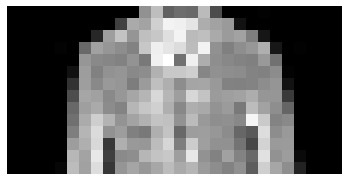

In [4]:
#Set Image to evaluate
idx = 10

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

In [5]:
#load data for half output images
f = open('output.txt')
content = f.readlines()[1:]
f.close()

data_sw = []
data_hw = []

for s in content:
  t = s.split(';')
  data_sw.append(float(t[0]))
  data_hw.append(float((t[1].split('\n'))[0]))
  
data_sw = np.asarray(data_sw)
data_hw = np.asarray(data_hw)


In [6]:
def image_combiner(cut, generated):
  full_image = np.concatenate((cut,generated))
  return full_image

(-0.5, 27.5, 27.5, -0.5)

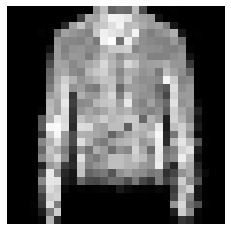

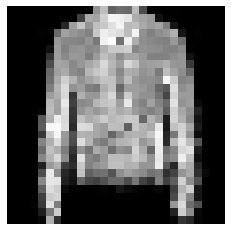

In [7]:
offset = 14*28    # offset for pixels of half image

# combined image for software output
output_sw = image_combiner(data[idx,:].reshape(14,28), 
                  data_sw[idx*offset:idx*offset+offset].reshape(14,28))

# combined image for hardware output
output_hw = image_combiner(data[idx,:].reshape(14,28), 
                  data_hw[idx*offset:idx*offset+offset].reshape(14,28))

plt.figure()
plt.imshow(output_sw.reshape((28,28)).astype(np.float32), cmap = 'gray')
plt.axis('off')

plt.figure()
plt.imshow(output_hw.reshape((28,28)).astype(np.float32), cmap = 'gray')
plt.axis('off')

In [8]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [9]:
import math

def psnr(img_data1, img_data2):
    mse = np.mean( (img_data1 - img_data2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def max_error (img_data1, img_data2):
    return np.max(abs(img_data1-img_data2))


In [10]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  8
Peak Signal-to-Noise Ratio:  47.01786978192068
